In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler as msc

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


## Data preprocess 

In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.shape


(2035, 8)

In [8]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [12]:
df.isnull().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

## Scaling data and removing unwanted columns

In [25]:
train_data=dataset.iloc[:, 1:2].values
scaler_data = msc(feature_range = (0, 1))
train_data = scaler_data.fit_transform(train_data)

In [26]:
train_data

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [29]:
y_train = []
x_train = []
for x in range(60,2035):
    x_train.append(train_data[x-60:x,0])
    y_train.append(train_data[x,0])

## converting training data into numpy array

In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train.shape , y_train.shape

((1975, 60), (1975,))

In [35]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


##Building model

In [38]:
regression = Sequential()

regression.add(LSTM(units = 40 , return_sequences = True , input_shape = (x_train.shape[1],1)))
regression.add(Dropout(.2))

regression.add(LSTM(units = 60 , return_sequences = True))
regression.add(Dropout(.2))

regression.add(LSTM(units = 80 , return_sequences = True))
regression.add(Dropout(.2))

regression.add(LSTM(units = 100))
regression.add(Dropout(.2))

regression.add(Dense(units = 1))

In [57]:
regression.compile(optimizer = 'adam' , loss= 'MSE')
regression.fit(x_train,y_train,epochs =80 , batch_size =32)

Epoch 1/80
62/62 [==============================] - 16s 156ms/step - loss: 7.1997e-04
Epoch 2/80
62/62 [==============================] - 10s 158ms/step - loss: 6.6167e-04
Epoch 3/80
62/62 [==============================] - 10s 158ms/step - loss: 7.2543e-04
Epoch 4/80
62/62 [==============================] - 10s 162ms/step - loss: 6.2118e-04
Epoch 5/80
62/62 [==============================] - 10s 159ms/step - loss: 6.0369e-04
Epoch 6/80
62/62 [==============================] - 10s 156ms/step - loss: 6.1010e-04
Epoch 7/80
62/62 [==============================] - 10s 156ms/step - loss: 7.2294e-04
Epoch 8/80
62/62 [==============================] - 10s 156ms/step - loss: 5.4651e-04
Epoch 9/80
62/62 [==============================] - 10s 154ms/step - loss: 5.5998e-04
Epoch 10/80
62/62 [==============================] - 10s 158ms/step - loss: 6.4582e-04
Epoch 11/80
62/62 [==============================] - 10s 158ms/step - loss: 6.6585e-04
Epoch 12/80
62/62 [==============================] -

## prepare data for prediction

In [58]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
RSP = dataset_test.iloc[:, 1:2].values
print(RSP)

[[220.1 ]
 [221.1 ]
 [229.45]
 [230.3 ]
 [237.7 ]
 [237.1 ]
 [229.7 ]
 [226.25]
 [215.  ]
 [215.  ]
 [215.5 ]
 [208.  ]
 [217.  ]
 [223.5 ]
 [230.  ]
 [234.55]]


In [59]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
input_data = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
input_data = input_data.reshape(-1,1)
input_data = scaler_data.transform(input_data)

In [60]:
x_test = []
for item in range(60,76):
    x_test.append(input_data[item-60:item,0])

In [61]:
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1], 1))

In [62]:
PSP = regression.predict(x_test)
PSP = scaler_data.inverse_transform(PSP)

## Plotting acutal result and our model predict result

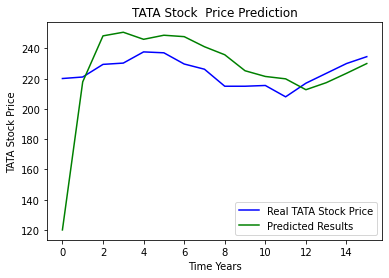

In [64]:
plt.plot(RSP , color = 'blue' , label = 'Real TATA Stock Price')
plt.plot(PSP , color = 'green' , label = 'Predicted Results' )
plt.title('TATA Stock  Price Prediction')
plt.xlabel('Time Years')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()